In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

**Note:** This notebook can run using TensorFlow 2.5.0

In [18]:
!pip install tensorflow==2.5.0

     |████████████████████████████████| 454.3 MB 18 kB/s 
     |████████████████████████████████| 462 kB 49.0 MB/s 
     |████████████████████████████████| 1.2 MB 36.3 MB/s 
     |████████████████████████████████| 4.0 MB 38.2 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68719 sha256=f8be788f491f613e2bbb47da714c9d6290e54c1ca0ec51ca8a3b28659c03a53d
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.42.0
    Uninstalling grpcio-1.42.0:
      Successfully uninstalled grpcio-1.42.0
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.13.3
    Uninstalling wrapt-1.13.3:
      Suc

In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [2]:
tokenizer = Tokenizer()

# sonnets.txt
!gdown --id 108jAePKK4R3BVYBbYJZ32JWUwxeMg20K

data = open('./sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

Downloading...
From: https://drive.google.com/uc?id=108jAePKK4R3BVYBbYJZ32JWUwxeMg20K
To: /content/sonnets.txt
100% 93.6k/93.6k [00:00<00:00, 29.2MB/s]


In [3]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 100)           321100    
                                                                 
 bidirectional (Bidirectiona  (None, 10, 300)          301200    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 10, 300)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               160400    
                                                                 
 dense (Dense)               (None, 1605)              162105    
                                                                 
 dense_1 (Dense)             (None, 3211)              5156866   
                                                        

In [4]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 22s 26ms/step - loss: 6.9021 - accuracy: 0.0226
Epoch 2/100
484/484 [==============================] - 13s 26ms/step - loss: 6.5044 - accuracy: 0.0235
Epoch 3/100
484/484 [==============================] - 13s 26ms/step - loss: 6.4115 - accuracy: 0.0228
Epoch 4/100
484/484 [==============================] - 13s 27ms/step - loss: 6.2980 - accuracy: 0.0289
Epoch 5/100
484/484 [==============================] - 13s 27ms/step - loss: 6.1997 - accuracy: 0.0355
Epoch 6/100
484/484 [==============================] - 13s 27ms/step - loss: 6.1174 - accuracy: 0.0373
Epoch 7/100
484/484 [==============================] - 13s 27ms/step - loss: 6.0394 - accuracy: 0.0407
Epoch 8/100
484/484 [==============================] - 13s 27ms/step - loss: 5.9560 - accuracy: 0.0438
Epoch 9/100
484/484 [==============================] - 13s 27ms/step - loss: 5.8646 - accuracy: 0.0475
Epoch 10/100
484/484 [==============================] - 13s 27ms/step - l

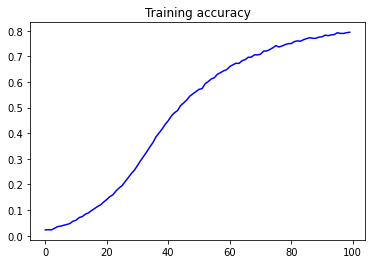

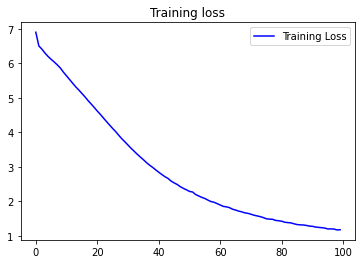

In [5]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [21]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	preds = model.predict(token_list, verbose=0)  	
	predicted = np.argmax(preds, axis=1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope out him up her faces eyes bevel life dote stay more rare rare live for thee hence they compile compile free twain part back another evil another store held taken small part lend cross cross dwells stand cured pain come such pride age are dwell and lusty leaves still delight strong grave ' arising torn room delight heir spent spent ' another nought another sense away delight pride spent spent spent ' gather'd ride clears deface hour more rare lies told for youth and wealth all thine thine shall no swift viewest make me so gone in well dead near
